In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


df = pd.read_csv('StackedArea_Data.csv', index_col=0)
df.index = [datetime.strptime(d, '%Y/%m/%d').date() for d in df.index]

Sum_df = df.apply(lambda x: x.sum(), axis=0).sort_values(ascending=False)

df = df[Sum_df.index]
df


,North_America,Europe,Asia,South_America,Africa
2002-06-30,23.0,9.3,13.2,7.9,7.9
2002-07-30,19.9,8.5,12.5,7.1,7.5
2002-08-30,21.0,8.0,12.5,7.6,7.9
2002-09-30,22.1,8.2,13.9,8.3,5.9
2002-10-30,25.1,10.7,14.4,9.4,6.1
...,...,...,...,...,...
2011-08-30,31.6,48.6,16.0,24.8,0.0
2011-09-30,31.5,42.8,15.4,18.4,4.5
2011-10-30,26.7,35.6,12.6,15.3,3.6
2011-11-30,27.3,35.3,13.0,15.0,3.9


## (a) 堆积面积图

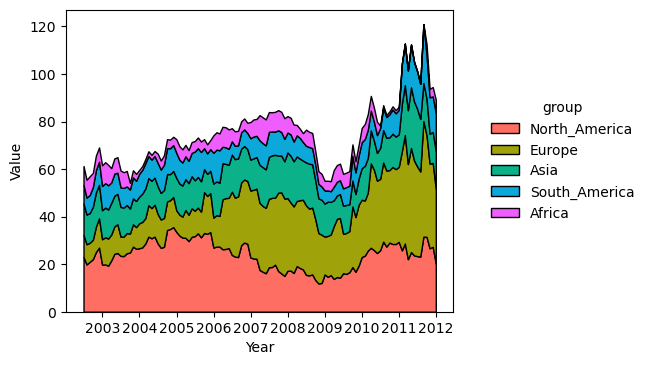

In [2]:
#from matplotlib.ticker import FormatDateFormatter


columns = df.columns

colors = sns.husl_palette(len(columns), h=15/360, l=.65, s=1).as_hex()

fig = plt.figure(figsize=(5, 4), dpi=100)
plt.stackplot(df.index.values,
              df.values.T, alpha=1, labels=columns, linewidth=1, edgecolor='k', colors=colors)

plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(title="group", loc="center right", bbox_to_anchor=(
    1.5, 0, 0, 1), edgecolor='none', facecolor='none')
# plt.gca().xaxis.set_major_formatter(FormatDateFormatter('%Y'))
# ax=plt.gca()
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=24))
plt.show()


## (b)百分比堆积面积图

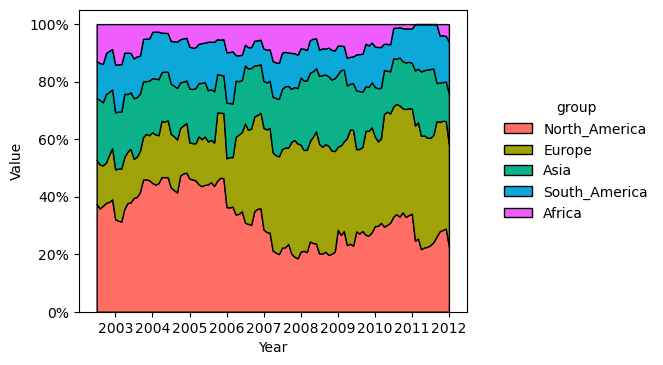

In [3]:
df = pd.read_csv('StackedArea_Data.csv', index_col=0)
df.index = [datetime.strptime(d, '%Y/%m/%d').date() for d in df.index]
SumRow_df = df.apply(lambda x: x.sum(), axis=1)
df = df.apply(lambda x: x/SumRow_df, axis=0)
meanCol_df = df.apply(lambda x: x.mean(), axis=0).sort_values(ascending=False)
df = df[meanCol_df.index]
columns = df.columns

colors = sns.husl_palette(len(columns), h=15/360, l=.65, s=1).as_hex()

fig = plt.figure(figsize=(5, 4), dpi=100)
plt.stackplot(df.index.values, df.values.T, labels=columns, colors=colors,
              linewidth=1, edgecolor='k')

plt.xlabel("Year")
plt.ylabel("Value")
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100)
                           for x in plt.gca().get_yticks()])
plt.legend(title="group", loc="center right", bbox_to_anchor=(
    1.5, 0, 0, 1), edgecolor='none', facecolor='none')

plt.show()
